In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

# <span style='color:red'>ch1. NLTK 자연어처리 패키지</span>
```
자연어처리 : 텍스트 전처리, 단어의 빈도수 측정, 문서의 유사도 측정, 연관분석, 딥러닝,
           워드임베딩, 텍스트분류, 어휘 데이터 베이스 사용, 감성분석, 분류분석
```
# 1. NLTK 패키지
- 텍스트 전처리 : 토큰화(문장, 어절, 형태소 나누기), 정규표현식을 이용하여 불용어를 처리, 어간추출
- 품사태깅 : 단어별 품사를 식별
- 어휘 데이터 베이스 사용
```
pip install nltk==3.7
```

In [2]:
import nltk

In [3]:
# 말뭉치 다운로드 받을 폴더
# c:/nltk_data, d:/nltk_data, e:/nltk_data
# c:/users/내컴퓨터이름/nltk_data
# c:/users/내컴퓨터이름/anaconda3/nltk_data
# c:/users/내컴퓨터이름/anaconda3/share/nltk_data
# c:/users/내컴퓨터이름/anaconda3/lib/nltk_data
# c:/users/내컴퓨터이름/AppData/Roaming/nltk_data
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [5]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
# 오스틴 소설 엠마 내용 데이터셋
emma=nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:30])

[Emma by Jane Austen 1816]

VO


In [7]:
type(emma), len(emma)

(str, 887071)

In [8]:
# sent_tokensize() : 문장 단위로 쪼갠 list 반환
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print('문장수 :', len(sent_tokens))
print("%r" % sent_tokens[0])

문장수 : 7456
'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'


In [9]:
# word_tokenize() : 단어 단위로 쪼갠 list 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [10]:
# RegexpTokenizer 클래스 : 토큰화할 때, 정규표현식
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('\d+') # [0-9] : \d
digits = ret.tokenize(emma)
print(digits)
ret1 = RegexpTokenizer('\w+') # [a-zA-Z0-9] : \w
words = ret1.tokenize(sent_tokens[0])
print(words)
ret1 = RegexpTokenizer('[a-zA-Z]+') # 해당 정규표현식에 맞는 단어만 추출
words = ret1.tokenize(sent_tokens[0])
print(words)

['1816', '8', '23', '28', '28', '24', '7', '10', '000', '10', '000', '26']
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']
['Emma', 'by', 'Jane', 'Austen', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미가 있는 가장 작은 단위)분석
cf. 자연어 처리의 기본은 형태소 분석과 품사태깅 - 어간추출(Stemming), 품사태깅(PostTagging) 

In [11]:
words = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']
# 어간 추출1 : PorterStemmer
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer
pst = PorterStemmer()
# pst.stem(words[0],words[1])
[pst.stem(word) for word in words]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [12]:
# 어간 추출2 : LancasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [13]:
# 어간 추출3 : RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

# 3. 품사태깅

In [14]:
# print('품사태깅할 내용 :',word_tokenize(sent_tokens[0]))

from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[0]))
print('품사태깅 결과 :', tagged_list)

품사태깅 결과 : [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('of', 'IN'), ('existence', 'NN'), (';', ':'), ('and', 'CC'), ('had', 'VBD'), ('lived', 'VBN'), ('nearly', 'RB'), ('twenty-one', 'CD'), ('years', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), ('with', 'IN'), ('very', 'RB'), ('little', 'JJ'), ('to', 'TO'), ('distress', 'VB'), ('or', 'CC'), ('vex', 'VB'), ('her', 'PRP'), ('.', '.')]


In [15]:
# 명사만 추출 : NN, NNS, NNP, NNPS, PRP
nouns_list = []
for word, tag in tagged_list:
    # if (tag=='NN') | (tag=='NNS') | (tag=='NNP') | (tag=='NNPS') | (tag=='PRP')
    # if tag in ['NN', 'NNS', 'NNP', 'NNPS'] :
    if tag.find('NN')!=-1:
        nouns_list.append(word)
print(nouns_list)

['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world']


In [16]:
nouns_list = [word for word, tag in tagged_list if tag.find('NN')!=-1]
print(nouns_list)

['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world']


## Quiz.emma 소설 안에서
1. 특수문자가 들어가지 않는 3글자 이상의 단어만 추출해서 품사태깅을 하시오(RegexpTokenizder).
2. "Emma" 단어가 몇번 등장했는지, 품사태깅이 어떤 품사들로 되어 있는지 모두 출력하시오
3. 내가 원하는 품사(명사: NN, NNS, NNP, NNPS)만 뽑아 등장하는 명사의 종류 갯수를 출력하시오. 

In [77]:
#1.특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
tokenizer = RegexpTokenizer('\w{3,}')
emma_words = tokenizer.tokenize(emma)
emma_tags  = pos_tag(emma_words)
print('emma 소설의 글자 수 :', len(emma))
print('emma 소설의 3글자 이상의 단어 수 :', len(emma_words))
print(len(emma_tags))
print('단어의 종류 수 :', len(set(emma_words)), len(set(emma_tags)))
# 한 단어가 다른 품사로 태깅될 수 있다

emma 소설의 글자 수 : 887071
emma 소설의 3글자 이상의 단어 수 : 123877
123877
단어의 종류 수 : 7630 11678


In [78]:
emma_tags[:5]

[('Emma', 'NNP'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP')]

In [79]:
# 2."Emma" 단어가 몇번 등장했는지, 품사태깅이 Emma가 어떤 품사들로 되어 있는지 모두 출력
# pos = set() # Emma의 품사들
# cnt = 0 # Emma 등장 횟수
# for word, tag in emma_tags:
#     if word=='Emma':
#         cnt += 1
#         pos.add(tag)
tags = [tag for word, tag in emma_tags if word=='Emma']
cnt = len(tags)
pos = set(tags)
print('Emma 등장 횟수 :', cnt)
print('Emma가 분류된 품사 :', pos)

Emma 등장 횟수 : 865
Emma가 분류된 품사 : {'NN', 'VBD', 'VBP', 'VB', 'NNPS', 'VBN', 'RB', 'JJ', 'NNS', 'NNP'}


In [80]:
# Emma로 분류된 품사의 갯수를 sort 출력
import pandas as pd
pos_cnt = pd.Series([0]*len(pos), index=pos)
for word, tag in emma_tags:
    if word == 'Emma':
        pos_cnt[tag] += 1
pos_cnt.sort_values(ascending=False) #내림차순 정렬

NNP     838
NN        7
VB        5
VBP       4
JJ        4
NNPS      2
NNS       2
VBD       1
VBN       1
RB        1
dtype: int64

In [81]:
# 3.emma에서 내가 원하는 품사(명사:NN, NNS, NNP, NNPS)만 뽑아 등장하는 명사의 종류 갯수 출력
tags = ['NN', 'NNS', 'NNP', 'NNPS']
# nouns_list = []
# for token, tag in emma_tags:
#     if tag in tags:
#         nouns_list.append(token)
nouns_list = [token for token, tag in emma_tags if tag in tags]
print('명사가 등장할 횟수 :', len(nouns_list))
print('등장한 명사의 수(중복제거) :', len(set(nouns_list)))
print('한단어가 나오는 평균 빈도수 :', len(nouns_list)/len(set(nouns_list)))

명사가 등장할 횟수 : 30781
등장한 명사의 수(중복제거) : 4165
한단어가 나오는 평균 빈도수 : 7.3903961584633855


# 4. 최빈 단어 시각화

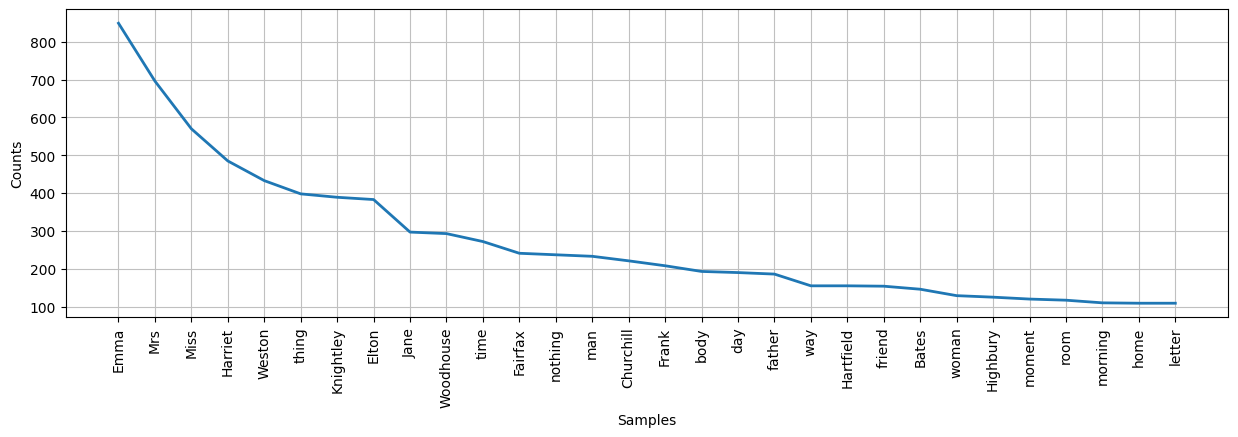

In [82]:
import matplotlib.pyplot as plt
# Text : 단어리스트와 관련된 빈도 분석이나 단어검색을 쉽게 할 수 있는 도구
from nltk import Text
plt.figure(figsize=(15,4))
emma_text = Text(nouns_list)
emma_text.plot(30)
plt.show()

In [83]:
emma_text.count('Emma')

849

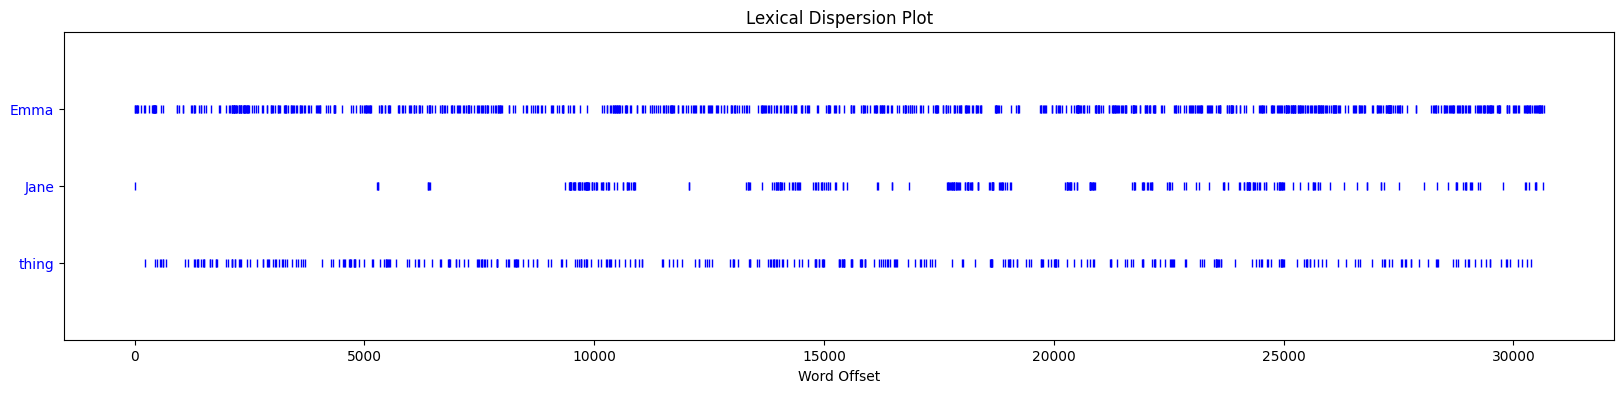

In [84]:
# 단어들이 텍스트 전체에서 어디에 나타나는지 시각적으로 보여주는 분산 그래프
plt.figure(figsize=(20,4))
emma_text.dispersion_plot(['Emma','Jane', 'thing'])

In [89]:
# 고유명사(이름) 출현빈도
name_list = [word for word, tag in emma_tags if tag.find('NNP')!=-1]
from nltk import FreqDist
name_wordcount = FreqDist(name_list)
name_wordcount

FreqDist({'Emma': 840, 'Mrs': 696, 'Miss': 569, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})

In [93]:
# 150번 이상 등장되는 고유명사
for name, freq in name_wordcount.items():
    if freq>150:
        print(name, ':', freq)

Emma : 840
Jane : 295
Woodhouse : 293
Miss : 569
Weston : 433
Mrs : 696
Hartfield : 155
Knightley : 389
Elton : 382
Churchill : 221
Frank : 208
Harriet : 484
Fairfax : 241


In [94]:
# 위의 내용을 sort
wordcnt = pd.Series(name_wordcount)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt[wordcnt>150]

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64